# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')                  

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
table_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all cells (td tags) in the row
    cols = row.find_all('td')
    
    # Extract the text from each cell and strip extra whitespace
    cols = [ele.text.strip() for ele in cols]
    
    # Only add the row if it contains data (non-empty)
    if cols:
        table_data.append(cols)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [14]:
# Confirm DataFrame was created successfully
df = pd.DataFrame(table_data, columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [16]:
# Change data types for data analysis
# Step 1: Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Step 2: Convert 'id', 'sol', 'month' to integer
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['month'] = df['month'].astype(int)

# Step 3: Convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [17]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                          object
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
unique_months

12

In [19]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = df['sol'].nunique()
unique_sols

1867

In [20]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
average_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

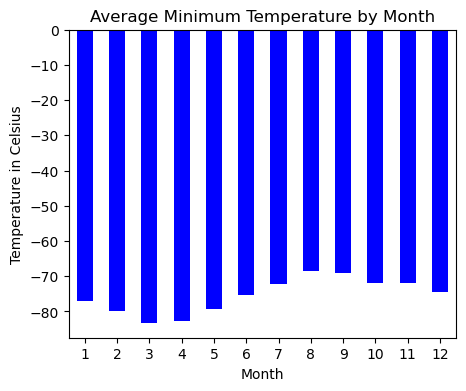

In [23]:
# Plot the average minimum temperature by month
# Group by 'month' and calculate the average 'min_temp'
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the average minimum temperature by month
plt.figure(figsize=(5, 4))
average_min_temp_by_month.plot(kind='bar', color='blue')

# Set title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.xticks(rotation=0)  # Keep the month labels horizontal
plt.show()

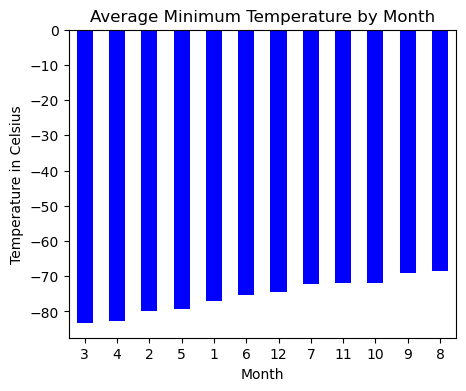

In [25]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Group by 'month' and calculate the average 'min_temp'
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the values to identify the coldest and hottest months
sorted_avg_temp = average_min_temp_by_month.sort_values()

# Plot the sorted average minimum temperature by month
plt.figure(figsize=(5, 4))
sorted_avg_temp.plot(kind='bar', color='blue')

# Set title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Highlight the coldest and hottest months
coldest_month = sorted_avg_temp.idxmin()
hottest_month = sorted_avg_temp.idxmax()

# Show the plot
plt.xticks(rotation=0)  # Keep the month labels horizontal
plt.show()

In [26]:
# 4. What is the average pressure by month?
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

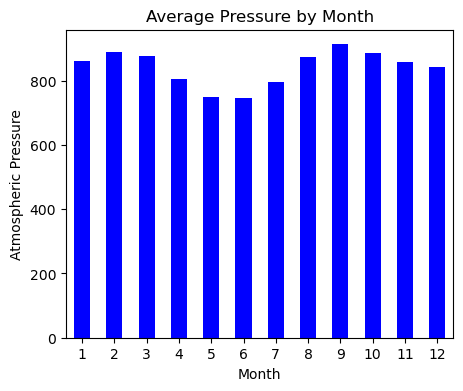

In [27]:
# Plot the average pressure by month
# Group by 'month' and calculate the average 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average atmospheric pressure by month
plt.figure(figsize=(5, 4))
average_pressure_by_month.plot(kind='bar', color='blue')

# Set title and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.xticks(rotation=0)  # Keep the month labels horizontal
plt.show()

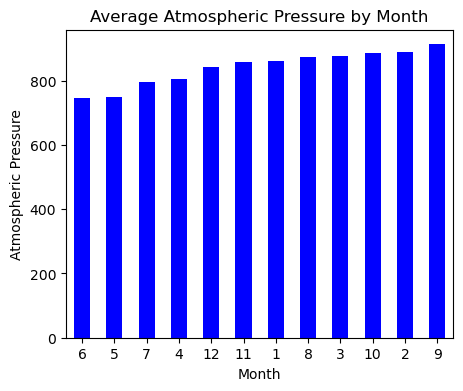

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Group by 'month' and calculate the average 'pressure'
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the values to identify the lowest and highest pressure months
sorted_avg_pressure = average_pressure_by_month.sort_values()

# Plot the sorted average pressure by month
plt.figure(figsize=(5, 4))
sorted_avg_pressure.plot(kind='bar', color='blue')

# Set title and labels
plt.title('Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Highlight the lowest and highest pressure months
lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()

# Show the plot
plt.xticks(rotation=0)  # Keep the month labels horizontal
plt.show()

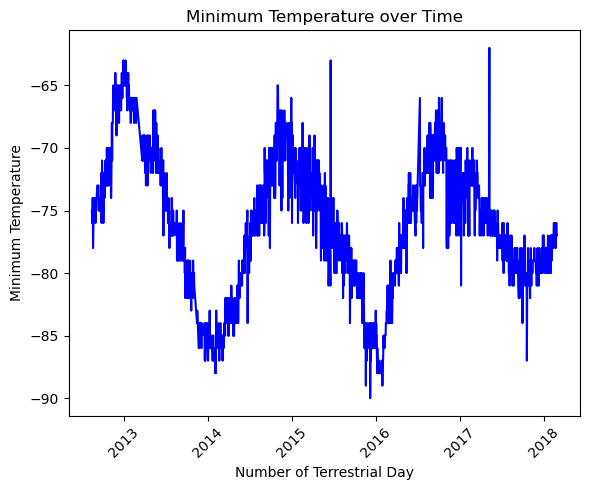

In [31]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Sort the data by terrestrial_date to ensure chronological order
df_sorted = df.sort_values(by='terrestrial_date')

# Plot the daily minimum temperature
plt.figure(figsize=(6, 5))
plt.plot(df_sorted['terrestrial_date'], df_sorted['min_temp'], color='blue', linestyle='-')

# Set title and labels
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Day')
plt.ylabel('Minimum Temperature')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Minimum Temperature

From the plot, I would expect to see this cycle repeat roughly every 687 Earth days, confirming the approximate length of a year.


#### Atmospheric Pressure

The atmospheric pressure on Mars is a crucial factor in understanding its climate and conditions. The seasonal variations in pressure, as well as the influence of Mars' elliptical orbit, result in pressure fluctuations that can be observed in the data. While the Martian atmosphere is thin and unable to support human life without protective measures, understanding these pressure changes is key for the success of Mars missions, future exploration, and potential colonization efforts.

#### Year Length

In conclusion, the length of a Martian year is approximately 687 Earth days, which is nearly two Earth years. This elongated year is marked by significant seasonal changes in temperature, atmospheric pressure, and climate conditions. By visually analyzing temperature fluctuations, we can see how Mars' longer orbital period affects its surface conditions and how scientists and engineers must account for these cycles when planning missions to the Red Planet.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
# Specify the name of the CSV file
csv_file_path = 'mars_data.csv'

# Write the DataFrame to the CSV file
df.to_csv(csv_file_path, index=False)

# Confirm that the file has been saved
print(f"Data has been written to {csv_file_path}")

Data has been written to mars_data.csv


In [33]:
browser.quit()